In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
#specify train , valid and test paths
train_path = 'flask_data/cats-and-dogs/train'
valid_path = 'flask_data/cats-and-dogs/valid'
test_path = 'flask_data/cats-and-dogs/test'

In [6]:
#use image data generator to convert images into arrays for model training.
train_batches = ImageDataGenerator().flow_from_directory(directory=train_path, target_size=(224,224),
    classes=['dog', 'cat'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(directory=valid_path, target_size=(224,224),
    classes=['dog', 'cat'], batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(directory=test_path, target_size=(224,224),
    classes=['dog', 'cat'], batch_size=6)

Found 60 images belonging to 2 classes.
Found 24 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


In [7]:
# plots images with labels within jupyter notebook
#dource code imported from tensorflow website to use plots to see the dummy vectors of our two main classes
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [8]:
imgs, labels = next(train_batches)

C:\Users\Souradipta Ganguly\anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


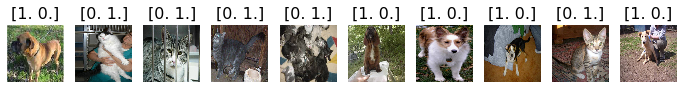

In [9]:
plots(imgs, titles=labels)

In [10]:
#using a simple model to make predictions
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)),
    Flatten(),
    Dense(2, activation='softmax'),
    ])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
flatten (Flatten)            (None, 1577088)           0         
_________________________________________________________________
dense (Dense)                (None, 2)                 3154178   
Total params: 3,155,074
Trainable params: 3,155,074
Non-trainable params: 0
_________________________________________________________________


In [12]:
#avoid overfitting
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
#since this is a very simple model it wont make good predictions
model.fit_generator(generator=train_batches, steps_per_epoch=6, 
    validation_data=valid_batches, validation_steps=6, epochs=5, verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
6/6 - 2s - loss: 2046.4065 - accuracy: 0.4333 - val_loss: 1845.1597 - val_accuracy: 0.5000
Epoch 2/5
6/6 - 1s - loss: 1210.1945 - accuracy: 0.5667 - val_loss: 1496.2272 - val_accuracy: 0.5000
Epoch 3/5
6/6 - 2s - loss: 841.0444 - accuracy: 0.5167 - val_loss: 578.0220 - val_accuracy: 0.5000
Epoch 4/5
6/6 - 2s - loss: 333.3477 - accuracy: 0.6000 - val_loss: 205.3026 - val_accuracy: 0.4167
Epoch 5/5
6/6 - 1s - loss: 285.8561 - accuracy: 0.6500 - val_loss: 539.3182 - val_accuracy: 0.5000


In [14]:
test_imgs, test_labels = next(test_batches)

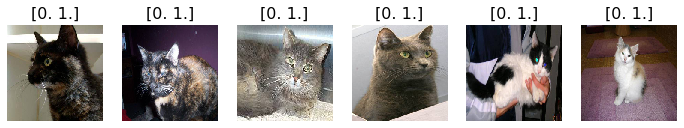

In [16]:
plots(test_imgs, titles=test_labels) #labels to be predicted

In [17]:
test_labels = test_labels[:,0]

In [18]:
test_labels

array([0., 0., 0., 0., 0., 0.], dtype=float32)

In [19]:
predictions = model.predict_generator(generator=test_batches, steps=1, verbose=0)

Instructions for updating:
Please use Model.predict, which supports generators.


In [21]:
 predictions  #actually predicted labels: quite wrong and erroneous as out of 6 cats it predicted 5 of them as dogs

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [22]:
cm = confusion_matrix(y_true=test_labels, y_pred=np.round(predictions[:,0]))  #confusion matrix to give us an idea of precision and recall

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1 5]
 [0 0]]


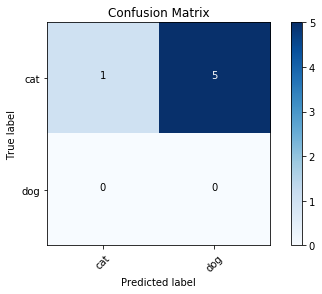

In [25]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix') #as it clearly illustrates, 1 right and 5 wrong predictions

In [54]:
vgg16_model = keras.applications.vgg16.VGG16() #using vgg16 model(award winning) to train our dataset

In [55]:
vgg16_model.summary()   #vgg 16 model consisting of multiple max pooling layers and convolution layers and dense layers

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [56]:
type(vgg16_model)

tensorflow.python.keras.engine.training.Model

In [57]:
model2 = Sequential()           #we need to change the last layer to predict 2 classes cat and dog not 1000, hence we dont take the last layer(transfer learning)
for layer in vgg16_model.layers[:-1]:
    model2.add(layer)


In [58]:
for layer in model2.layers:          #we dont train the layers as they already are
    layer.trainable = False

In [59]:
model2.add(Dense(2, activation='softmax')) # we add the last layer ourself to predict cat vs dog

In [61]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [62]:
model2.compile(optimizer=Adam(learning_rate=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
model2.fit_generator(generator=train_batches, steps_per_epoch=6, 
                    validation_data=valid_batches, validation_steps=6, epochs=6, verbose=2)

Epoch 1/6
6/6 - 19s - loss: 1.7731 - accuracy: 0.4333 - val_loss: 1.6114 - val_accuracy: 0.4583
Epoch 2/6
6/6 - 18s - loss: 1.0464 - accuracy: 0.5500 - val_loss: 1.0185 - val_accuracy: 0.6667
Epoch 3/6
6/6 - 18s - loss: 0.5861 - accuracy: 0.7333 - val_loss: 0.7706 - val_accuracy: 0.7917
Epoch 4/6
6/6 - 19s - loss: 0.3945 - accuracy: 0.8333 - val_loss: 0.6078 - val_accuracy: 0.7917
Epoch 5/6
6/6 - 19s - loss: 0.2771 - accuracy: 0.9000 - val_loss: 0.4917 - val_accuracy: 0.7917
Epoch 6/6
6/6 - 19s - loss: 0.1924 - accuracy: 0.9333 - val_loss: 0.4217 - val_accuracy: 0.7917


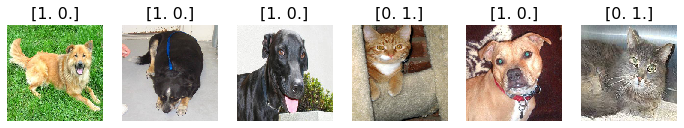

In [64]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [70]:
predictions=model2.predict_generator(generator=test_batches, steps=1, verbose=0)

In [71]:
predictions.round()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [72]:
test_labels = test_labels[:,0]

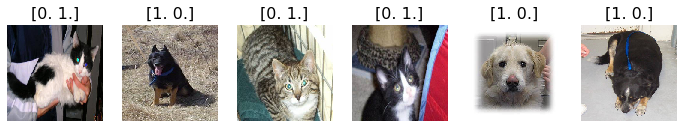

In [73]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [74]:
predictions = model2.predict_generator(generator=test_batches, steps=1, verbose=0)

In [75]:
predictions.round()

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [76]:
#hence we have a better accuracy. If we add more data or tweak our code further, we can get better outputs